In [40]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sn
import statsmodels.api as sns

Importing data

In [41]:
data = pd.read_csv('/Users/dikshantthapa/PycharmProjects/pythonProject/ML_Contents/Data Files/day1/House_Price.csv',header=0)

In [42]:
data.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [43]:
data.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


From the above dataset we can say that the column named n_hos_beds needs to be worked on as the number of data available is invalid or the value is not available also the multivariate columns indicating the same thing distances should be replaced with one column.

In [45]:
data.n_hos_beds = data['n_hos_beds'].fillna(data.n_hos_beds.mean())

In [44]:
data.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


In [26]:
data['avg_distance']=(data['dist1']+data['dist2']+data['dist3']+data['dist4'])/4

<Axes: xlabel='airport', ylabel='count'>

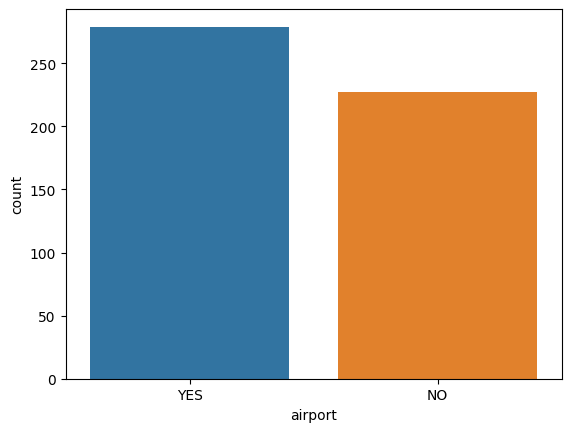

In [51]:
sn.countplot(x=data['airport'])

In [52]:
del data['dist1']

In [53]:
del data['dist2']

In [54]:
del data['dist3']

In [55]:
del data['dist4']

In [56]:
data.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [57]:
data=pd.get_dummies(data)

In [58]:
data.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River,bus_ter_YES
0,24.0,0.00632,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.1920,23,0.049347,0,1,0,0,0,1,1
1,21.6,0.02731,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.1728,42,0.046146,1,0,1,0,0,0,1
2,34.7,0.02729,37.07,0.469,7.185,61.1,22.2,4.03,7.394,101.1200,38,0.045764,1,0,0,0,1,0,1
3,33.4,0.03237,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.2672,45,0.047151,0,1,1,0,0,0,1
4,36.2,0.06905,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.2896,55,0.039474,1,0,1,0,0,0,1


In [59]:
del data['airport_NO']

In [60]:
del data['waterbody_None']

In [61]:
data.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River,bus_ter_YES
0,24.0,0.00632,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.1920,23,0.049347,1,0,0,1,1
1,21.6,0.02731,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.1728,42,0.046146,0,1,0,0,1
2,34.7,0.02729,37.07,0.469,7.185,61.1,22.2,4.03,7.394,101.1200,38,0.045764,0,0,0,0,1
3,33.4,0.03237,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.2672,45,0.047151,1,1,0,0,1
4,36.2,0.06905,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.2896,55,0.039474,0,1,0,0,1


<Axes: >

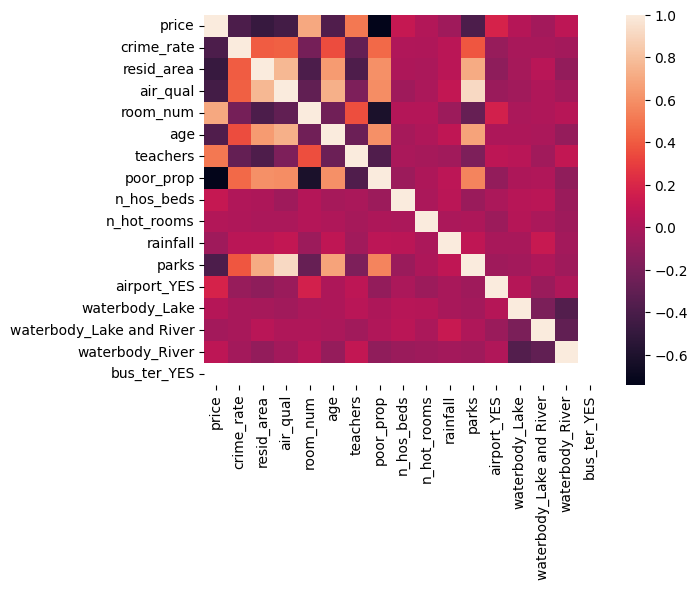

In [106]:
sn.heatmap(data.corr())

Single variable Linear Regression (METHOD 1 USING SKLEARN)

In [66]:
x=data[['room_num']]

In [64]:
y=data['price']

In [65]:
lm1 = LinearRegression()

In [67]:
lm1.fit(x,y)

LinearRegression()

In [68]:
print(lm1.coef_,lm1.intercept_)

[9.09966966] -34.659243123097156


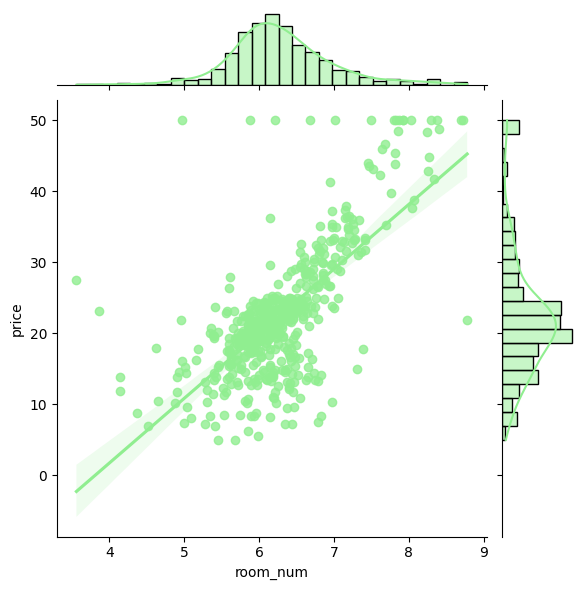

In [78]:
sn.jointplot(x=data['room_num'],y=data['price'],kind='reg',color='lightgreen')

In [79]:
y_pred = lm1.predict(x)

In [80]:
y_pred

array([25.17108491, 23.76973578, 30.72188341, 29.02024518, 30.37609596,
       23.85163281, 20.04797089, 21.50391804, 16.58099675, 19.97517353,
       23.36935032, 20.02067188, 18.92871152, 19.4746917 , 20.81234314,
       18.42822969, 19.34729633, 19.84777816, 14.98855456, 17.45456504,
       16.0259169 , 19.62028642, 21.23092795, 18.23713663, 19.24719996,
       16.28980732, 18.23713663, 20.36645933, 24.44311134, 26.07195221,
       17.32716966, 20.59395107, 19.48379137, 17.21797363, 20.81234314,
       19.32909699, 18.49192738, 18.57382441, 19.62938609, 25.3530783 ,
       29.25683659, 26.9455205 , 21.47661903, 21.85880515, 20.56665206,
       17.0450799 , 17.99144555, 20.21176495, 14.46987339, 16.31710633,
       19.60208708, 20.98523687, 24.58870605, 19.92057552, 18.91961185,
       31.30426226, 23.42394834, 27.3641053 , 21.25822696, 19.27449897,
       17.58196041, 19.62938609, 24.08822422, 26.87272314, 29.98481016,
       22.57767906, 18.00054522, 18.82861516, 16.24430897, 18.89

Linear Regression (METHOD 2 USING STATSMODEL)

In [81]:
X1 = sns.add_constant(data['room_num'])

In [84]:
lm2 = sns.OLS(data['price'],x).fit()

In [87]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              4634.
Date:                Sun, 23 Apr 2023   Prob (F-statistic):                   1.46e-256
Time:                        21:54:22   Log-Likelihood:                         -1745.9
No. Observations:                 506   AIC:                                      3494.
Df Residuals:                     505   BIC:                                      3498.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
room_num       3.6527      0.054     68.071      0.000       3.547       3.758
==============================================================================
Omnibus:                       84.104   Durbin-Watson:                   0.490
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.924
Skew:                           0.957   Prob(JB):                     1.39e-34
Kurtosis:                       4.931   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

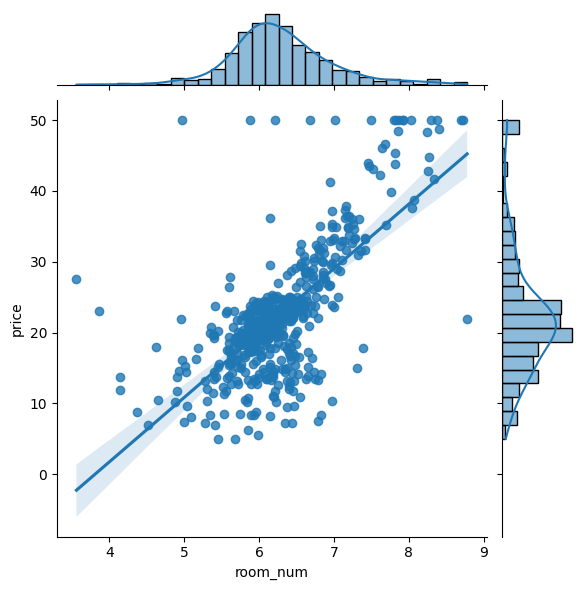

In [88]:
sn.jointplot(x=data['room_num'],y=data['price'],kind='reg')

In [89]:
y_pred_1 = lm2.predict(x)

In [90]:
y_pred_1

0      24.016497
1      23.453981
2      26.244644
3      25.561589
4      26.105841
         ...    
501    24.082246
502    22.354519
503    25.481229
504    24.816438
505    22.025776
Length: 506, dtype: float64

MULTI VARIATE LINEAR REGRESSION (USING SKLEARN)

In [92]:
x_multi = data.drop("price",axis=1)

In [93]:
y_multi =data['price']

In [95]:
lm3 = LinearRegression()

In [96]:
lm3.fit(x_multi,y_multi)

LinearRegression()

In [97]:
print(lm3.coef_,lm3.intercept_)

[-6.11517130e-02  5.05660518e-02 -1.16874823e+01  4.32320157e+00
  2.66807839e-02  9.46475082e-01 -5.68829992e-01  4.48010721e-01
  3.93195846e-02  1.02094862e-02  6.13030784e+01  1.16361163e+00
  2.91021938e-01 -5.89910186e-01 -4.26683071e-02  0.00000000e+00] -23.429912903221176


In [98]:
Y_prediction_multi = lm3.predict(x_multi)

In [99]:
Y_prediction_multi

array([29.90148972, 25.950637  , 34.8552539 , 32.2054821 , 29.98185944,
       27.69592146, 24.85944215, 21.63594005, 14.11777031, 23.83712711,
       21.52628972, 24.17258172, 20.94637254, 20.86741447, 20.73544223,
       21.50014697, 19.49675953, 16.97789344, 16.66513823, 17.88790181,
       13.14304794, 19.82867445, 16.75584686, 15.47104474, 17.99460356,
       16.600778  , 17.91284222, 17.87649414, 21.54142432, 22.47727366,
       13.59571932, 20.85220317, 10.21765942, 16.12098153, 16.8466654 ,
       23.69036597, 19.77162983, 22.145411  , 21.43717913, 28.36957648,
       30.75599716, 27.43280904, 24.93181517, 24.66851003, 23.4505442 ,
       20.72626286, 21.24405804, 19.41814768,  9.15324838, 16.93387536,
       22.33123004, 26.18847514, 29.25627233, 24.37387895, 18.27150643,
       32.00111557, 27.29692016, 33.67188092, 22.68955312, 21.40985265,
       18.32292113, 18.52110183, 25.56014321, 24.14539509, 28.64176673,
       28.41786427, 23.50682134, 22.57451839, 19.18934299, 22.28

In [100]:
y_multi

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    19.0
Name: price, Length: 506, dtype: float64

In [102]:
r2_score(y_multi,Y_prediction_multi)

0.6998354599513434

Hence we Got the value of R^2 = 0.699 which is greater than 0.5 and also nearer to the 0.5 so we can conclude that the value has higher accuracy

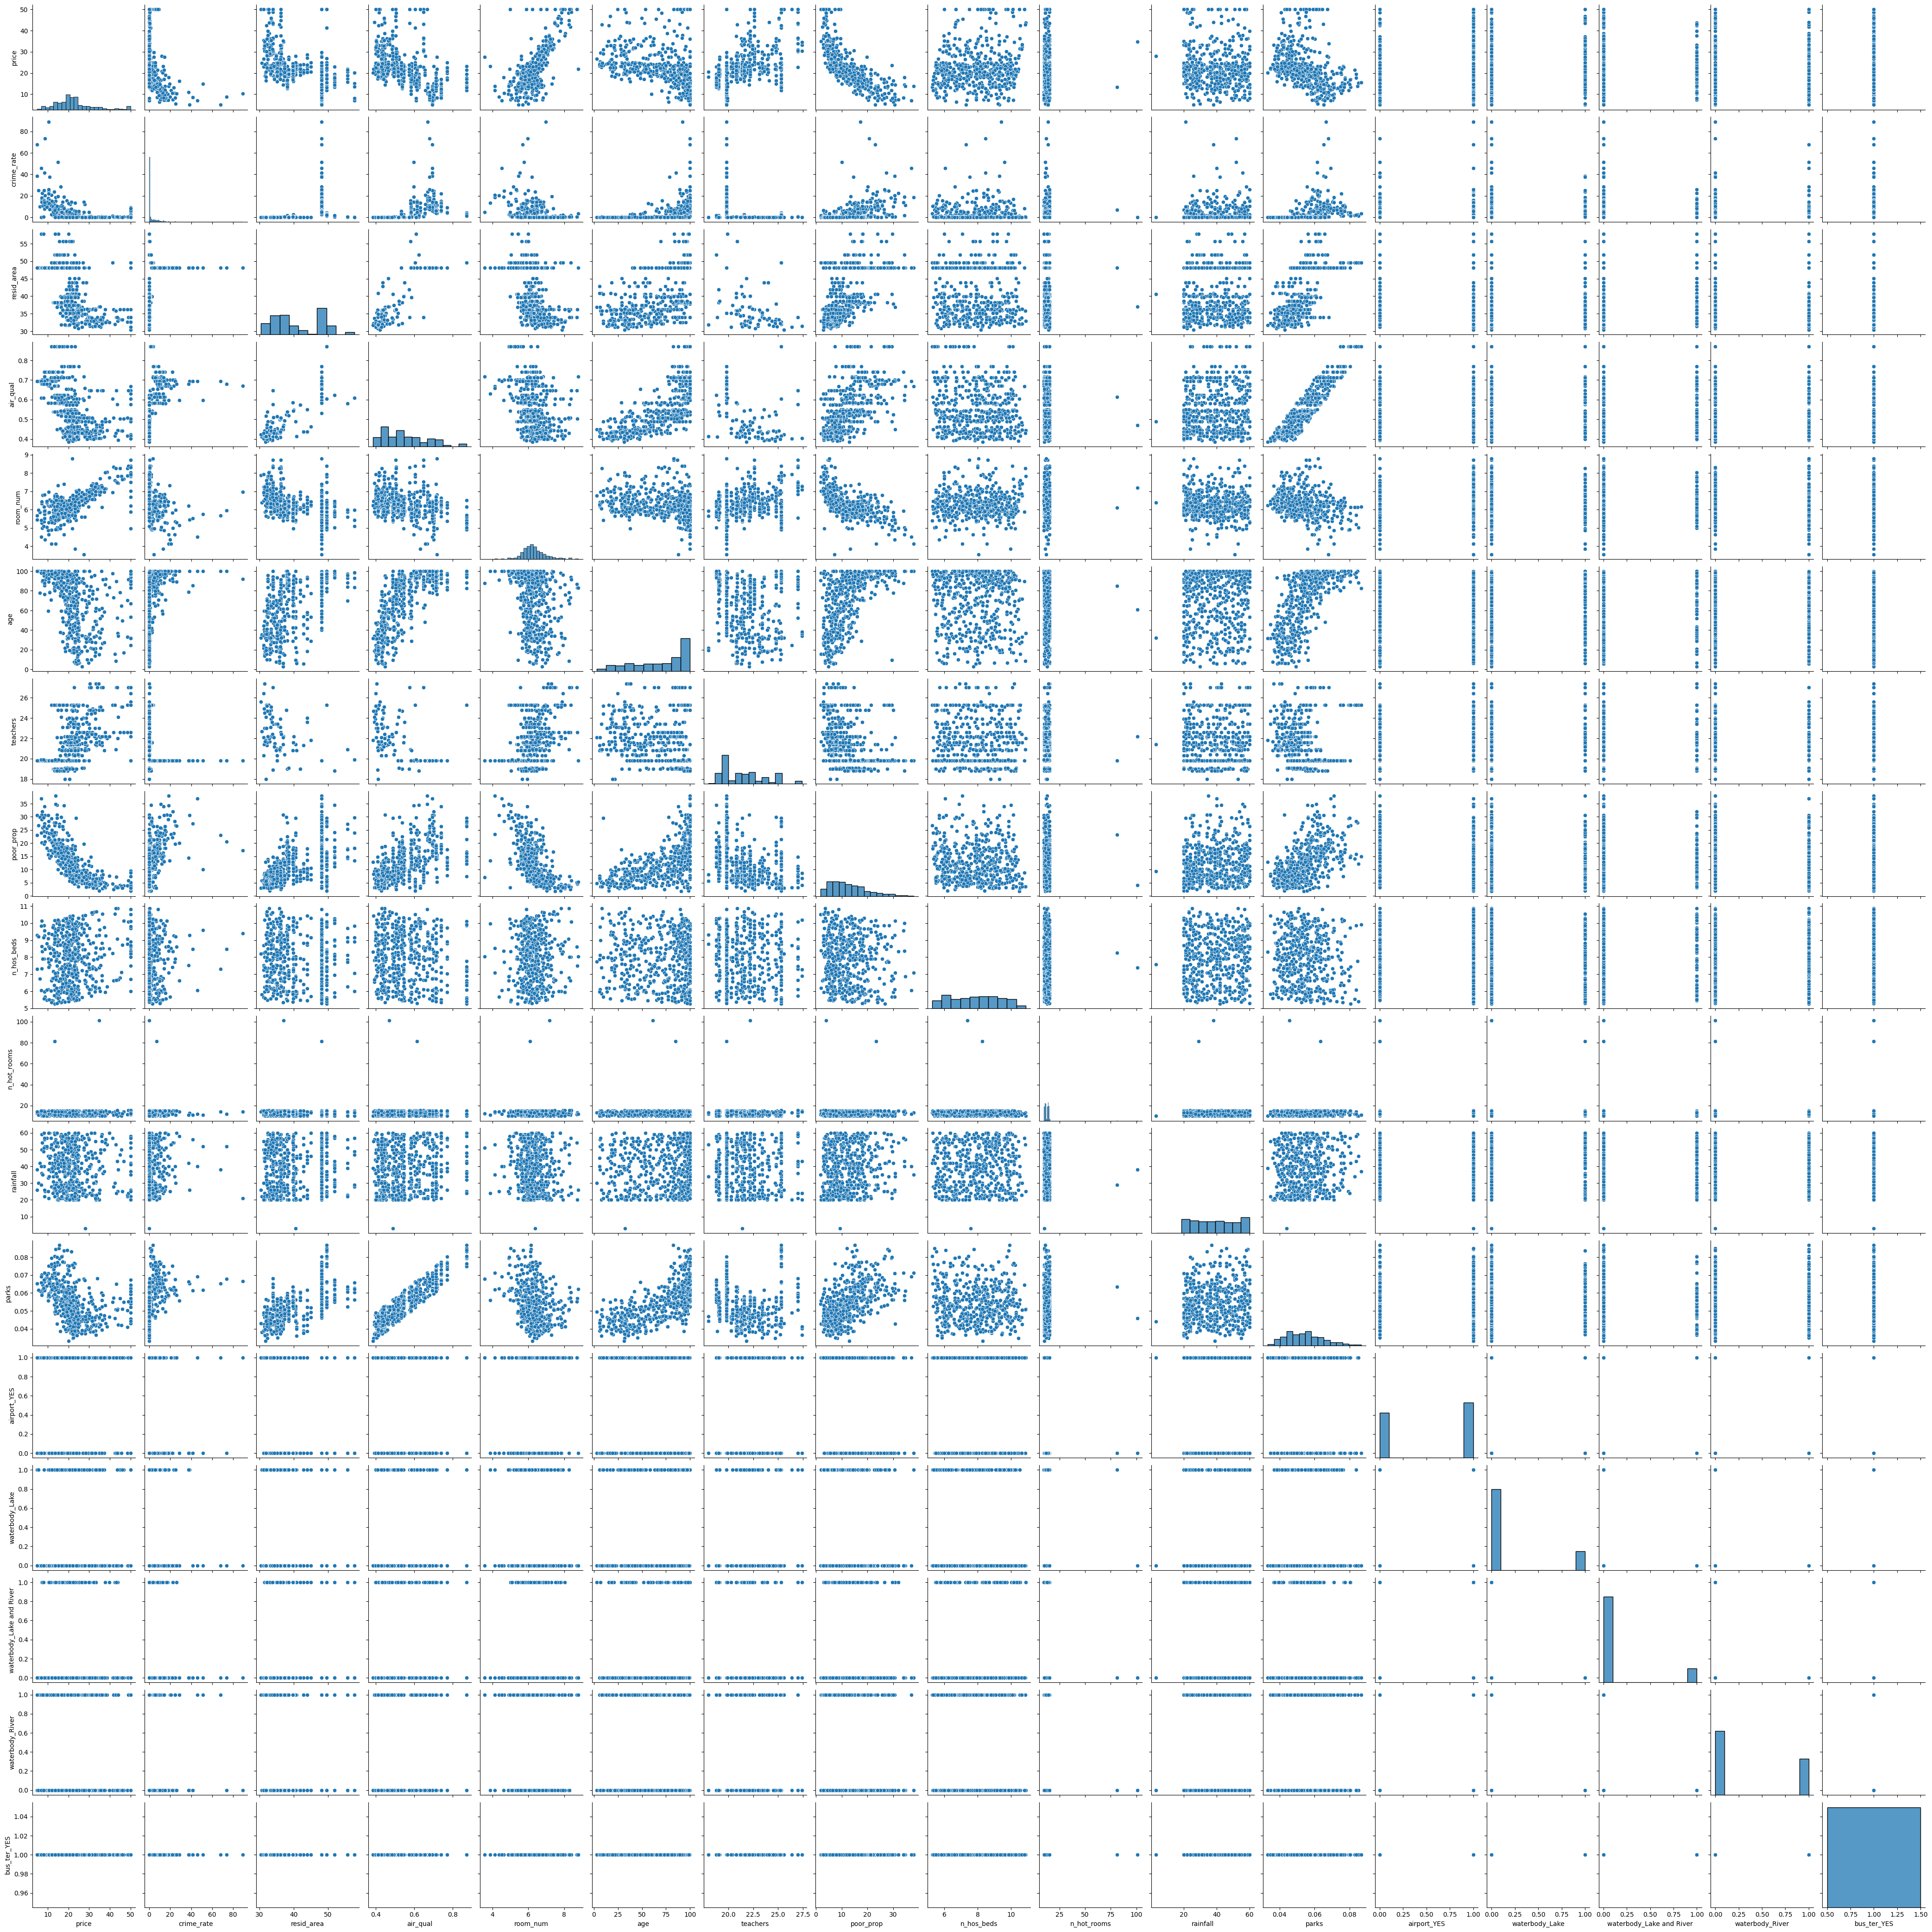

In [103]:
sn.pairplot(data)